# Support Vector Machines on the Fashion MNIST Dataset

In this project, we apply the Support Vector Classifier (SVC) to the Fashion MNIST dataset, which contains 28x28 grayscale images of various fashion products. The dataset is available through TensorFlow, Keras, and sklearn.datasets. As this dataset is designed for classification tasks, we focus solely on SVC and exclude regression methods like SVR.



## Loading the Dataset

Fashion MNIST dataset can be loaded from TensorFlow/Keras datasets. If you don't have TensorFlow/Keras installed, you can use the OpenML version of the dataset.

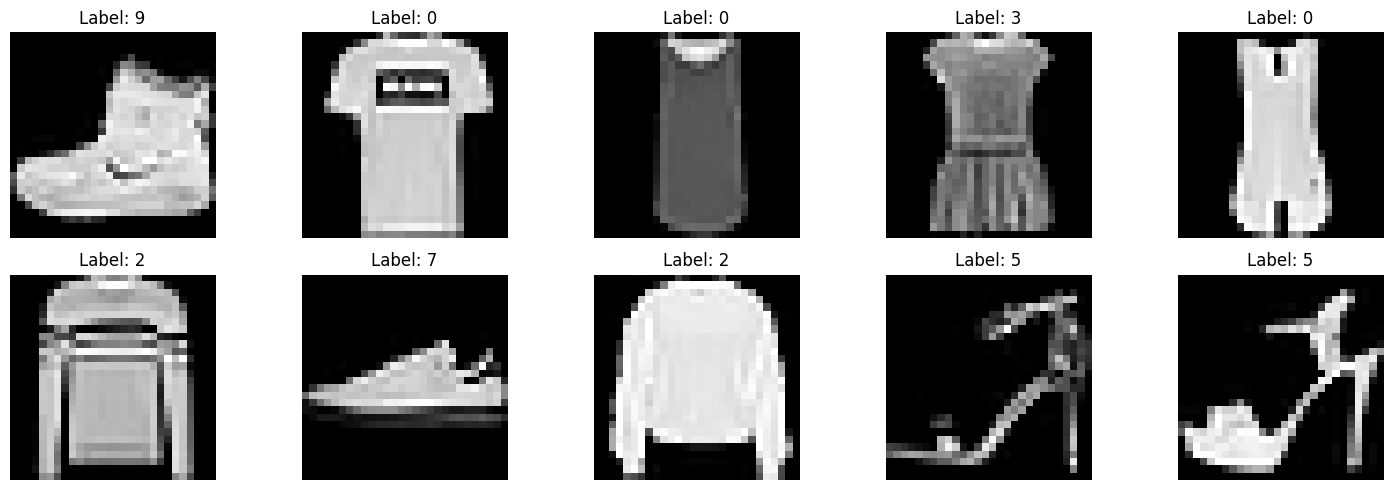

In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
data = datasets.fetch_openml('fashion-mnist', version=1)
X = data.data
y = data.target.astype(int)

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].to_numpy().reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()



## Preprocessing the Data
Preprocessing involves reshaping the images and splitting the dataset into training and testing sets. Additionally, feature scaling is essential for SVMs.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training the SVC Model
We'll start with a linear kernel to see how it performs on this dataset.

In [11]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

# Initialize the LinearSVC model
svc_linear = LinearSVC(C=10, max_iter=10000)

# Use PCA for dimensionality reduction
pca = PCA(n_components=250)
X_train_small = X_train_scaled[:10000]
y_train_small = y_train[:10000]
X_train_pca = pca.fit_transform(X_train_small)

# Train the model
svc_linear.fit(X_train_pca, y_train_small)


c:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, max_iter=10000)

Evaluating the Model


c:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


Accuracy: 68.00%


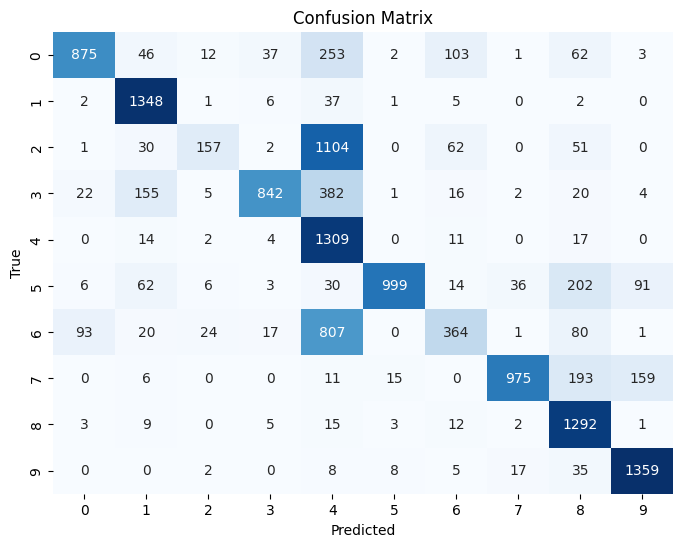

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Transform the test set using PCA
X_test_pca = pca.transform(X_test)

# Make predictions
y_pred = svc_linear.predict(X_test_pca)
accuracy = accuracy_score(y_pred, y_test)

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Hyperparameter Tuning
We use GridSearchCV to fine-tune the regularization parameter (C), kernel type, and gamma.




In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train_small)

# Display results
results_df = pd.DataFrame(grid_search.cv_results_)
styled_df = results_df[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score', 'std_test_score']].style.background_gradient(cmap='viridis').format(
    {'mean_test_score': '{:.2f}', 'std_test_score': '{:.4f}'}
)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")
styled_df


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.864


,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
0,0.100000,linear,scale,0.83,0.0025
1,0.100000,rbf,scale,0.78,0.0027
2,1,linear,scale,0.81,0.0075
3,1,rbf,scale,0.85,0.0021
4,10,linear,scale,0.80,0.0056
5,10,rbf,scale,0.86,0.0063


## Conclusion
This project demonstrates the application of Support Vector Machines on the Fashion MNIST dataset. By leveraging PCA for dimensionality reduction and hyperparameter tuning, we achieved an optimal accuracy of approximately 86% using an RBF kernel. The experiment highlights the importance of feature scaling, dimensionality reduction, and parameter tuning when applying SVMs to high-dimensional datasets.

Further improvements could involve exploring more kernels, increasing the training dataset size, or utilizing advanced feature engineering techniques.